# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: David Freeman

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: DF

## Instructions

Total Points: 100

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [2]:
# !jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [3]:
# make sure numpy is installed
%pip install -q numpy
%pip install -q matplotlib
%pip install -q pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [5]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

np.str_('north')

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [6]:
def simple_environment(agent_function, max_steps, verbose = True):
    cells_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"): # If the action performed by the agent is one of the possible actions
            cells_cleaned += 1

    return cells_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [7]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: south
step 2 - action: suck
step 3 - action: suck
step 4 - action: north
step 5 - action: suck
step 6 - action: suck
step 7 - action: east
step 8 - action: east
step 9 - action: suck
step 10 - action: south
step 11 - action: suck
step 12 - action: east
step 13 - action: west
step 14 - action: west
step 15 - action: suck
step 16 - action: west
step 17 - action: north
step 18 - action: west
step 19 - action: suck


8

# Tasks

## General [10 Points]

1. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
2. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
3. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/Lee-U-Schmurr/Vacuum-World/blob/main/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold a 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

### Creating the simulation environment

In this section, I create the function create_simple_environment() to generate a random map for the vacuum to clean

In [27]:
import random

# Generates a random map (5x5) with random cells that are tagged 'dirty' for the vacuum to clean
def simulation_environment(grid_dimension, max_steps = None, verbose = True, agent_function=False, agent=False):
    actions_taken = 0 # Stores performance measure of how many energy units are spent on actions
    p = 0.2 # Probablity that a cell is dirty
    rng = np.random.default_rng() # numpy default random number generator
    # Generates an nxn grid filled with 0s to represent the vacuum map
    grid = rng.choice([1,0], size = [grid_dimension,grid_dimension], p = [p, 1-p])
    row = random.randrange(0, grid_dimension - 1) # x-coordinate of current agent position
    col = random.randrange(0, grid_dimension - 1) # y-coordinate of current agent position
    default_bumpers = {"north" : False, "south" : False, "west" : False, "east" : False} # Stores original bumpers
    bumpers = default_bumpers.copy() # Stores current bumpers to guide agent through grid
    if verbose:
        print(agent_function)
        print(grid)
        print("starting position", row, col)

    while True:
        bumpers = default_bumpers.copy() # Resets bumpers to original state for current iteration
        if verbose:
            print("Environment agent position is: ", row, col)
        # Checks to see if the current cell is dirty.  If dirty, marks cell as clean since vacuum cleans it
        if grid[row, col] == 1:
            dirty = True
        else:
            dirty = False

        # Sets column bumpers for the agent so that it will not go outside the grid
        if col == 0:
            bumpers["west"] = True
        elif col == grid_dimension - 1:
            bumpers["east"] = True
            
        # Sets row bumpers for the agent so that it will not go outside the grid
        if row == 0:
            bumpers["north"] = True
        elif row == grid_dimension - 1:
            bumpers["south"] = True
        
        if verbose:
            print("BUMPERS: ", bumpers)
        
        # If the an agent function was passed, use it, else use the act method in the agent object        
        if agent_function:
            action = agent_function(bumpers, dirty)
        elif agent:
            action = agent.act(bumpers, dirty, verbose)
            
        # actions_taken += 1
        
        # Use action to move the vacuum to a new position if a direction or clean cell if suck
        match action:
            case "suck":
                if grid[row, col] == 1:
                    grid[row, col] = 0
                actions_taken += 1
            case "north":
                row -= 1 if bumpers["north"] is False else 0
                actions_taken += 1
            case "south":
                row += 1 if bumpers["south"] is False else 0
                actions_taken += 1
            case "east":
                col += 1 if bumpers["east"] is False else 0
                actions_taken += 1
            case "west":
                col -= 1 if bumpers["west"] is False else 0
                actions_taken += 1
        
        
        if np.sum(grid, dtype = np.uint8) == 0:
            if verbose:
                print("The final grid:\n", grid)
            return actions_taken
        
        if max_steps is not None:
            if actions_taken >= max_steps:
                return actions_taken
        
        if (verbose): 
            print("step", actions_taken , "- action:", action)

Show that your environment works with the simple randomized agent from above.

In [31]:
# Function call to create a simple environment using a simple randomized agent
simulation_environment(agent_function=simple_randomized_agent, max_steps=50, grid_dimension=100, verbose=True)

<function simple_randomized_agent at 0x7f31fefcf6a0>
[[0 0 1 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
starting position 56 34
Environment agent position is:  56 34
BUMPERS:  {'north': False, 'south': False, 'west': False, 'east': False}
step 1 - action: west
Environment agent position is:  56 33
BUMPERS:  {'north': False, 'south': False, 'west': False, 'east': False}
step 2 - action: suck
Environment agent position is:  56 33
BUMPERS:  {'north': False, 'south': False, 'west': False, 'east': False}
step 3 - action: west
Environment agent position is:  56 32
BUMPERS:  {'north': False, 'south': False, 'west': False, 'east': False}
step 4 - action: south
Environment agent position is:  57 32
BUMPERS:  {'north': False, 'south': False, 'west': False, 'east': False}
step 5 - action: south
Environment agent position is:  58 32
BUMPERS:  {'north': False, 'south': False, 'west': False, 'east': False}
step 6 - action: south
En

50

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

### Implementing a simple reflex agent

Below, I create a simple reflex agent that understands its current position and can react to hitting barriers. It prioritizes cleaning cleaning a cell if it is on a dirty cell over moving to a different cell.

In [10]:
# Implementing a reflex agent
def simple_reflex_agent(bumpers, dirty):
    possible_actions = [] # Stores possible actions after evaluating bumpers
    if dirty: # If current cell is dirty is will suck before moving
        return "suck"
    else: # If current cell is clean, it will check for bumpers and then randomly 
          # move to a cell without a bumper
        for direction, bumper in bumpers.items():
            if bumper is False:
                possible_actions.append(direction)
        return np.random.choice(possible_actions)
        


Show how the agent works with your environment.

### Simple Reflex Agent Test


In [11]:
# Function call to test the simple reflex agent
simulation_environment(agent_function=simple_reflex_agent, max_steps = 50, grid_dimension=5, verbose=True)

<function simple_reflex_agent at 0x7f31fc0cb7e0>
[[0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 1 1]
 [0 0 0 0 0]
 [1 0 0 0 0]]
starting position 2 0
Environment agent position is:  2 0
BUMPERS:  {'north': False, 'south': False, 'west': True, 'east': False}
step 1 - action: east
Environment agent position is:  2 1
BUMPERS:  {'north': False, 'south': False, 'west': False, 'east': False}
step 2 - action: south
Environment agent position is:  3 1
BUMPERS:  {'north': False, 'south': False, 'west': False, 'east': False}
step 3 - action: west
Environment agent position is:  3 0
BUMPERS:  {'north': False, 'south': False, 'west': True, 'east': False}
step 4 - action: south
Environment agent position is:  4 0
BUMPERS:  {'north': False, 'south': True, 'west': True, 'east': False}
step 5 - action: suck
Environment agent position is:  4 0
BUMPERS:  {'north': False, 'south': True, 'west': True, 'east': False}
step 6 - action: north
Environment agent position is:  3 0
BUMPERS:  {'north': False, 'south': False, '

50

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/Lee-U-Schmurr/Vacuum-World/blob/main/store_agent_state_information.ipynb))

# Implementing the model-based reflex agent
Below, I created a model_based_agent class that allows for model-based-agents to be created in Vacuum World.  Each agent will store its internal position after it reaches the top left corner in the grid.  It will then move to the top right of the grid counting the number of tiles it enters to calculate the dimensions of the grid.  After initializing itself like this, it will continue to clean the rest of the grid.

In [12]:
# The agent will store a position state which holds where the agent is in relation to the grid.
# It will attempt to move to the top left corner of the grid first, then the top right to calibrate itself. 
# After calibration, it will move across each row in the grid alternating between right to left and left
# to right until it has cleaned all of the dirty cells in the environment

## How the agent works

The model-reflex-agent begins by moving into the top left corner of the grid.  This is to have it start where the grid is row(0) col(0).  After arriving at the top left corner, the agent will move east until it hits the top right corner.  As it moves along the top edge, it will count how many spaces it moved until it hits the top right corner.  Once it hits the top right corner, it will know the dimensions of the grid (since the grids are always squares).  Once it has this knowledge, it will alternate between moving from right to left and left to right across each row and suck up any dirt that it finds until it cleans all of the dirty tiles.  Once the entire environmental board is clean, the simulation ends.

In the output below, the agent's position in the agent's mind is represent as the number '8' in the grid while tiles that it has not visited are represented by '1's and tiles it has visited are represented by '0's.

In [13]:
# Model-Based-Agent class.  This allows for model-based-agents to be created an clean a grid in vacuum world
class Agent:
    def __init__(self):
        self.in_top_left_corner = False # Stores whether or not the agent is in the top left corner of the grid to begin its search
        self.in_top_right_corner = False # Stores whether the agent has reached the top right corner and calibrated itself
        self.row = None # State of the agent.  Stores its row position in the grid
        self.col = None # State of the agent.  Stores its column position in the grid
        self.cleaned_tiles = np.ones((1,1), dtype=int) # Stores grid of tiles that the agent has left to clean. Similar to grid in environment.
        self.agent_visual_grid = [] # Visual grid to help user keep track of agent's location
        self.dimension = 1 # Stores the dimension of one side of the grid. Starts at 1 since grid will at least be size 1.
    
    def act(self, bumpers, dirty, verbose):
        if not self.in_top_left_corner: # If the agent is not in the top left corner of the map it will move there first
            if bumpers["west"] is False:
                return "west" # The agent will move as far west as possible
            elif bumpers["north"] is False:
                return "north" # The agent moves north to the top left corner to begin its search for dirt
            else:
                self.row = 0
                self.col = 0
                self.in_top_left_corner = True # Flag to let agent know it reached the top left
        
        if not self.in_top_right_corner:
            if bumpers["east"] is False:
                self.col += 1
                self.dimension += 1
                return "east"
            else:
                self.in_top_right_corner = True # Flag to let agent know it reached the top right
                self.cleaned_tiles = np.ones((self.dimension, self.dimension), dtype=int) # Creates agent-memory grid to keep track of where it has been/cleaned
        
        self.agent_visual_grid = self.cleaned_tiles
        self.agent_visual_grid[self.row, self.col] = 8
        if verbose:
            print("MY COORDINATES: ", self.row, self.col)
            print("MY BUMPERS: ", bumpers)
            print(self.agent_visual_grid)
        
        if dirty: # If the current environment cell is dirty, it should clean it
            self.cleaned_tiles[self.row, self.col] = 0
            return "suck"
        
        # The agent cleans each row going back and forth from west to east and east to west.
        # It also keeps track of where it has been before and avoids moving into them again.
        if bumpers["east"] is False and self.cleaned_tiles[self.row, self.col + 1] == 1:
            self.cleaned_tiles[self.row, self.col] = 0
            self.col += 1
            return "east"
        elif bumpers["north"] is False and self.cleaned_tiles[self.row - 1, self.col] == 1:
            self.cleaned_tiles[self.row, self.col] = 0
            self.row -= 1
            return "north"
        elif bumpers["west"] is False and self.cleaned_tiles[self.row, self.col - 1] == 1:
            self.cleaned_tiles[self.row, self.col] = 0
            self.col -= 1
            return "west"
        elif bumpers["south"] is False and self.cleaned_tiles[self.row + 1, self.col] == 1:
            self.cleaned_tiles[self.row, self.col] = 0
            self.row += 1
            return "south"

Show how the agent works with your environment.

In [14]:
# Calling Model Agent Function to clean the simulation environment
vacuum = Agent()
simulation_environment(agent=vacuum, max_steps = 50, grid_dimension=5, verbose=True)

False
[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]]
starting position 1 1
Environment agent position is:  1 1
BUMPERS:  {'north': False, 'south': False, 'west': False, 'east': False}
step 1 - action: west
Environment agent position is:  1 0
BUMPERS:  {'north': False, 'south': False, 'west': True, 'east': False}
step 2 - action: north
Environment agent position is:  0 0
BUMPERS:  {'north': True, 'south': False, 'west': True, 'east': False}
step 3 - action: east
Environment agent position is:  0 1
BUMPERS:  {'north': True, 'south': False, 'west': False, 'east': False}
step 4 - action: east
Environment agent position is:  0 2
BUMPERS:  {'north': True, 'south': False, 'west': False, 'east': False}
step 5 - action: east
Environment agent position is:  0 3
BUMPERS:  {'north': True, 'south': False, 'west': False, 'east': False}
step 6 - action: east
Environment agent position is:  0 4
BUMPERS:  {'north': True, 'south': False, 'west': False, 'east': True}
MY COORDINATES:  0

28

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/Lee-U-Schmurr/Vacuum-World/blob/main/charts_and_tables.ipynb))

# Code to Track How many Actions Each Agent uses to Clean the Room

This code tracks the performance measure described in the PEAS description for the agent.  The performance measure in PEAS is how many actions it takes each agent to clean the room.

In [15]:
NUMBER_OF_RUNS = 100 # Number of times to run the simulation

# Runs simple agent in the simulation 100 times and records the number of actions the agent took in each run
def find_simple_agent_actions(grid_dim):
    actions_per_run = [] # Holds how many actions the agent took to clean a room in one run. 
                         # One run is represented by 1 element in the list
    print(f"Running simulation for size: {grid_dim}")
    for i in range(NUMBER_OF_RUNS):
        print(f"SIMPLE RUN NUMBER {i} FOR SIZE {grid_dim}")
        num_of_actions = simulation_environment(grid_dimension=grid_dim, agent_function=simple_randomized_agent, verbose=False)
        actions_per_run.append(num_of_actions)
    return actions_per_run


# Runs reflex agent in the simulation 100 times and records the number of actions the agent took in each run
def find_reflex_agent_actions(grid_dim):
    actions_per_run = [] # Holds how many actions the agent took to clean a room in one run. 
                         # One run is represented by 1 element in the list
    print(f"Running simulation for size: {grid_dim}")
    for i in range(NUMBER_OF_RUNS):
        print(f"REFLEX RUN NUMBER {i} FOR SIZE {grid_dim}")
        num_of_actions = simulation_environment(grid_dimension=grid_dim, agent_function=simple_reflex_agent, verbose=False)
        actions_per_run.append(num_of_actions)
    return actions_per_run
    
    
# Runs model-based agent in the simulation 100 times and records the number of actions the agent took in each run 
def find_model_based_reflex_agent_actions(grid_dim):
    actions_per_run = [] # Holds how many actions the agent took to clean a room in one run. 
                         # One run is represented by 1 element in the list
    print(f"Running simulation for size: {grid_dim}")
    for i in range(NUMBER_OF_RUNS):
        print(f"MODEL RUN NUMBER {i} FOR SIZE {grid_dim} ")
        vacuum = Agent() # Model-based agent object to use in the simulation
        num_of_actions = simulation_environment(grid_dimension=grid_dim, agent=vacuum, verbose=False)
        actions_per_run.append(num_of_actions)
    return actions_per_run



# Histogram Showing the Distribution of the Number of Actions Taken By Each Agent

Running simulation for size: 5
SIMPLE RUN NUMBER 0 FOR SIZE 5
SIMPLE RUN NUMBER 1 FOR SIZE 5
SIMPLE RUN NUMBER 2 FOR SIZE 5
SIMPLE RUN NUMBER 3 FOR SIZE 5
SIMPLE RUN NUMBER 4 FOR SIZE 5
SIMPLE RUN NUMBER 5 FOR SIZE 5
SIMPLE RUN NUMBER 6 FOR SIZE 5
SIMPLE RUN NUMBER 7 FOR SIZE 5
SIMPLE RUN NUMBER 8 FOR SIZE 5
SIMPLE RUN NUMBER 9 FOR SIZE 5
SIMPLE RUN NUMBER 10 FOR SIZE 5
SIMPLE RUN NUMBER 11 FOR SIZE 5
SIMPLE RUN NUMBER 12 FOR SIZE 5
SIMPLE RUN NUMBER 13 FOR SIZE 5
SIMPLE RUN NUMBER 14 FOR SIZE 5
SIMPLE RUN NUMBER 15 FOR SIZE 5
SIMPLE RUN NUMBER 16 FOR SIZE 5
SIMPLE RUN NUMBER 17 FOR SIZE 5
SIMPLE RUN NUMBER 18 FOR SIZE 5
SIMPLE RUN NUMBER 19 FOR SIZE 5
SIMPLE RUN NUMBER 20 FOR SIZE 5
SIMPLE RUN NUMBER 21 FOR SIZE 5
SIMPLE RUN NUMBER 22 FOR SIZE 5
SIMPLE RUN NUMBER 23 FOR SIZE 5
SIMPLE RUN NUMBER 24 FOR SIZE 5
SIMPLE RUN NUMBER 25 FOR SIZE 5
SIMPLE RUN NUMBER 26 FOR SIZE 5
SIMPLE RUN NUMBER 27 FOR SIZE 5
SIMPLE RUN NUMBER 28 FOR SIZE 5
SIMPLE RUN NUMBER 29 FOR SIZE 5
SIMPLE RUN NUMBER 3

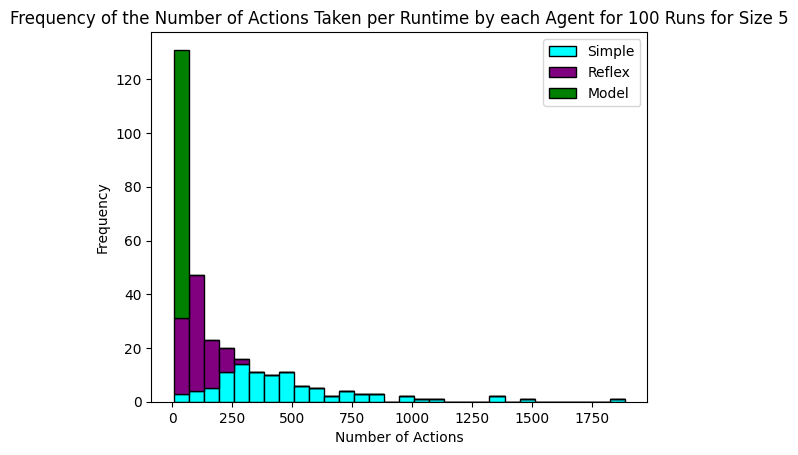

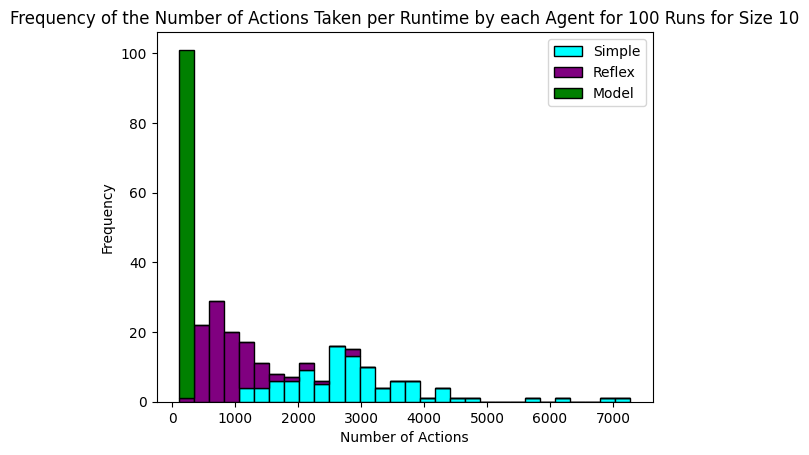

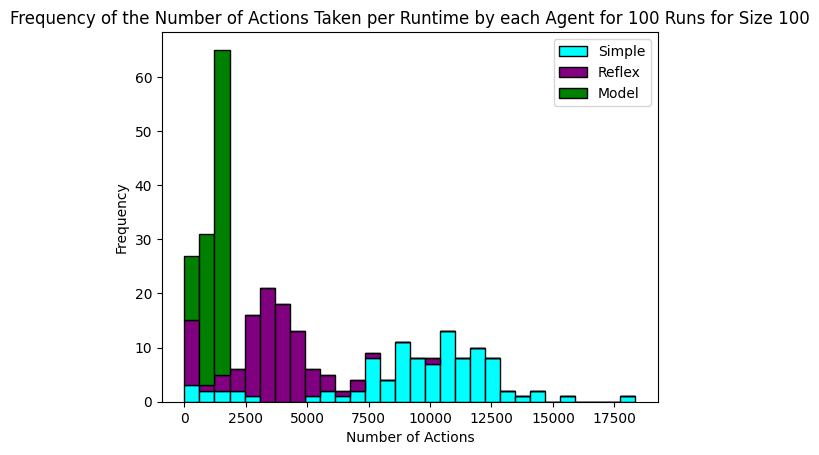

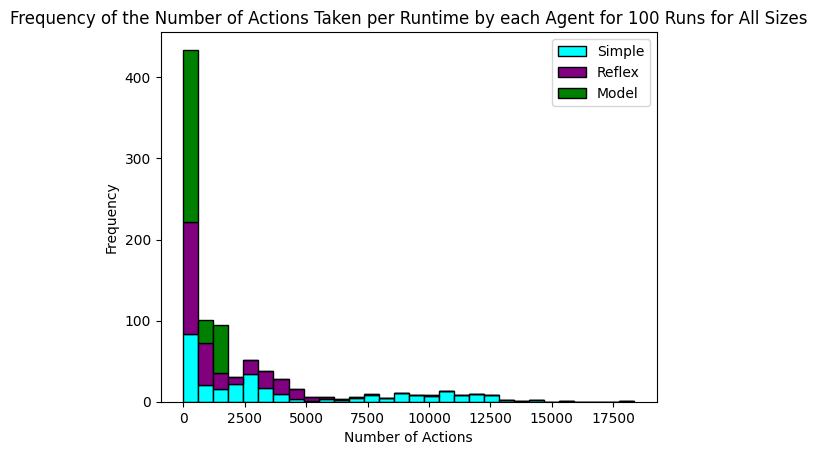

In [16]:
import matplotlib.pyplot as plt
# Will obtain lists containing the number of actions take by each agent for each run of the simulation
# for a specified grid size (5x5, 10x10, or 15x15).  It will find the average number of actions taken
# for each agent in each grid size.

# Runs each agent 100 times and records the list of the number of actions in each run inside of a dict entry.
# The key matches the grid dimensions of the simulation.  Ex: for simple agent running in a 5x5 grid, it will go
# in the simple_agent_actions[5] value.
sizes = [5, 10, 100]
simple_agent_actions = {size: find_simple_agent_actions(size) for size in sizes}
reflex_agent_actions = {size: find_reflex_agent_actions(size) for size in sizes}
model_agent_actions =  {size: find_model_based_reflex_agent_actions(size) for size in sizes}

agg_simple_agent_actions = []
agg_reflex_agent_actions = []
agg_model_agent_actions = []

# Creates a master list of all the number of actions taken by the simple agent in each run
for item in simple_agent_actions.values():
    agg_simple_agent_actions.extend(item)
    
# Creates a master list of all the number of actions taken by the reflex agent in each run
for item in reflex_agent_actions.values():
    agg_reflex_agent_actions.extend(item)
    
# Creates a master list of all the number of actions taken by the model agent in each run
for item in model_agent_actions.values():
    agg_model_agent_actions.extend(item)

# Creates a dictionary for each agent containing the average number of actions taken for each size
simple_avg_actions = {size: np.average(simple_agent_actions[size]) for size in sizes}
reflex_avg_actions = {size: np.average(reflex_agent_actions[size]) for size in sizes}
model_avg_actions = {size: np.average(model_agent_actions[size]) for size in sizes}

# Prints avg number of actions the simple random agent took for each size
for key, avg in simple_avg_actions.items():
    print("SIMPLE AVG :", key, avg)

# Prints avg number of actions the simple reflex agent took for each size
for key, avg in reflex_avg_actions.items():
    print("REFLEX AVG: ", key, avg)    
    
# Prints avg number of actions the model-based reflex agent took for each size
for key, avg in model_avg_actions.items():
    print("MODEL AVG: ", key, avg)


# Creates a histograph showing the frequencies of runs that took place across each agent for size 5
plt.hist([simple_agent_actions[5], reflex_agent_actions[5], model_agent_actions[5]], bins=30, stacked=True, color=["cyan", "purple", "green"],edgecolor="black")
plt.xlabel('Number of Actions')
plt.ylabel('Frequency')
plt.title('Frequency of the Number of Actions Taken per Runtime by each Agent for 100 Runs for Size 5')
plt.legend(['Simple', 'Reflex', 'Model'])
plt.show()

# Creates a histograph showing the frequencies of runs that took place across each agent for size 10
plt.hist([simple_agent_actions[10], reflex_agent_actions[10], model_agent_actions[10]], bins=30, stacked=True, color=["cyan", "purple", "green"],edgecolor="black")
plt.xlabel('Number of Actions')
plt.ylabel('Frequency')
plt.title('Frequency of the Number of Actions Taken per Runtime by each Agent for 100 Runs for Size 10')
plt.legend(['Simple', 'Reflex', 'Model'])
plt.show()

# Creates a histograph showing the frequencies of runs that took place across each agent for size 100
plt.hist([simple_agent_actions[100], reflex_agent_actions[100], model_agent_actions[100]], bins=30, stacked=True, color=["cyan", "purple", "green"],edgecolor="black")
plt.xlabel('Number of Actions')
plt.ylabel('Frequency')
plt.title('Frequency of the Number of Actions Taken per Runtime by each Agent for 100 Runs for Size 100')
plt.legend(['Simple', 'Reflex', 'Model'])
plt.show()

# Creates a histograph showing the frequencies of runs that took place across each agent for all sizes
plt.hist([agg_simple_agent_actions, agg_reflex_agent_actions, agg_model_agent_actions], bins=30, stacked=True, color=["cyan", "purple", "green"],edgecolor="black")
plt.xlabel('Number of Actions')
plt.ylabel('Frequency')
plt.title('Frequency of the Number of Actions Taken per Runtime by each Agent for 100 Runs for All Sizes')
plt.legend(['Simple', 'Reflex', 'Model'])
plt.show()


# Analysis of Action Data for each Agent

It is clear from the histogram that the model agent performed the best out of the three agents, the reflex agent was mediocre, and the random agent was the slowest and worst at cleaning the grid in a reasonable number of actions.  For size 5, all of the model agent's runs took less than 40 actions while the reflex agent had some runs that took over 5,000 actions and the random agent sometimes took over 14,000 actions.

The model agent performed much better than the other agents because it had an internal model (strategy), accurate sensors, and an updating state space.  These tools allowed it to move to a favorable position and then strategically moving in a way that maximized its action efficiency to ensure it did not traverse over any tiles that it had already visited and cleaned once it had calibrated itself.

The reflex agent had a middling performance because it did not have an internal strategy that was helping it make intelligent decisions.  The only assistance it had was sensors that would prevent it from travelling outside the grid.  Outside of this, it performed in a similar manner to the simple random agent except for the fact that it prioritized cleaning dirty tiles if it found them and chose a random direction to move from a list of possible directions that were not blocked by a bumper.

The simple random agent performed the worst out of any of the agents because it had no built-in intelligence.  It did not have its own bumpers, so the environment had to keep it within the grid whenever it tried to leave the grid. This caused it to make completely random decisions and increased the number of actions it had to take in order to finish cleaning the grid.

## Code To Run Each Agent and Track Their Average Runtimes

In [17]:
# Functions that run each agent 100 times using a specified size
import time

NUMBER_OF_TESTS = 100

# Runs the simple agent 100 times and times how long it takes to do 100 runs
def run_simple_agent(grid_dim):
    execution_times = []
    for i in range(NUMBER_OF_TESTS):
        start = time.perf_counter()
        simulation_environment(grid_dimension=grid_dim, agent_function=simple_randomized_agent, verbose=False)
        end = time.perf_counter()
        execution_times.append(end-start)
    return execution_times

def run_simple_reflex_agent(grid_dim):
    execution_times = []
    for i in range(NUMBER_OF_TESTS):
        start = time.perf_counter()
        simulation_environment(grid_dimension=grid_dim, agent_function=simple_reflex_agent, verbose=False)
        end = time.perf_counter()
        execution_times.append(end-start)
    return execution_times

def run_model_based_reflex_agent(grid_dim):
    execution_times = []
    for i in range(NUMBER_OF_TESTS):
        vacuum = Agent()
        start = time.perf_counter()
        simulation_environment(grid_dimension=grid_dim, agent=vacuum, verbose=False)
        end = time.perf_counter()
        execution_times.append(end-start)
    return execution_times

# Average Run-Time for Simple Agent

In [18]:
# Runs the simple agent and calculates the average performance time for 100 runs of each 
# grid dimension.  Prints results to the screen.
five_simple = run_simple_agent(5)
five_avg_simple = np.average(five_simple)
print("SIMPLE AGENT AVG TIME FOR GRID 5: ", five_avg_simple)
ten_simple = run_simple_agent(10)
ten_avg_simple = np.average(ten_simple)
print("SIMPLE AGENT AVG TIME FOR GRID 10: ", ten_avg_simple)
fifteen_simple = run_simple_agent(15)
fifteen_avg_simple = np.average(fifteen_simple)
print("SIMPLE AGENT AVG TIME FOR GRID 15: ", fifteen_avg_simple)


SIMPLE AGENT AVG TIME FOR GRID 5:  0.01588389562998145
SIMPLE AGENT AVG TIME FOR GRID 10:  0.08332291488999317
SIMPLE AGENT AVG TIME FOR GRID 15:  0.2943391457599978


# Average Time for Simple Reflex Agent

In [19]:
# Runs the simple reflex agent and calculates the average performance time for 100 runs of each 
# grid dimension.  Prints results to the screen.
five_reflex = run_simple_reflex_agent(5)
five_avg_reflex = np.average(five_reflex)
print("SIMPLE REFLEX AGENT AVG TIME FOR GRID 5: ", five_avg_reflex)
ten_reflex = run_simple_reflex_agent(10)
ten_avg_reflex = np.average(ten_reflex)
print("SIMPLE REFLEX AGENT AVG TIME FOR GRID 10: ", ten_avg_reflex)
fifteen_reflex = run_simple_reflex_agent(15)
fifteen_avg_reflex = np.average(fifteen_reflex)
print("SIMPLE REFLEX AGENT AVG TIME FOR GRID 15: ", fifteen_avg_reflex)



SIMPLE REFLEX AGENT AVG TIME FOR GRID 5:  0.008790150410006844
SIMPLE REFLEX AGENT AVG TIME FOR GRID 10:  0.04971767636999175
SIMPLE REFLEX AGENT AVG TIME FOR GRID 15:  0.1465539201899969


# Average Time for Model-Based Reflex Agent

In [20]:
# Runs the model based reflex agent and calculates the average performance time for 100 runs of each 
# grid dimension.  Prints results to the screen.
five_model = run_model_based_reflex_agent(5)
five_avg_model = np.average(five_model)
print("MODEL BASED REFLEX AGENT AVG TIME FOR GRID 5: ", five_avg_model)
ten_model = run_model_based_reflex_agent(10)
ten_avg_model = np.average(ten_model)
print("MODEL BASED REFLEX AGENT AVG TIME FOR GRID 10: ", ten_avg_model)
fifteen_model = run_model_based_reflex_agent(15)
fifteen_avg_model = np.average(fifteen_model)
print("MODEL BASED REFLEX AGENT AVG TIME FOR GRID 15: ", fifteen_avg_model)





MODEL BASED REFLEX AGENT AVG TIME FOR GRID 5:  0.0012427109600025687
MODEL BASED REFLEX AGENT AVG TIME FOR GRID 10:  0.002235184609992302
MODEL BASED REFLEX AGENT AVG TIME FOR GRID 15:  0.0029222387400022853


# Table Showing Average Number of Actions Taken by the Agent to Clean the Entire Grid for Different Sizes

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code).  This table measures runs where verbose is set to False.  I realize that these numbers do not match with the numbers of my peers.  My best hypothesis for why this is the case is that my simulation automatically quits once all of the dirty tiles have been cleaned and does not let the agent move across every tile in the grid.

| Size     | Model-Based Agent | Simple Reflex Agent | Simple Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 100x100     | 443.23| 2915.52| 9104.75|
| 10x10   | 99.16| 931.38| 3340.26|
| 5x5 | 31.56| 133.48| 1232.13|

Add charts to compare the performance of the different agents.

# Graph Showcasing All Three Agents Working
The following code generates a bar graph which displays the run times for all three of the agents at their respective sizes.  In later sections, there will be graphs showcasing the run times for individual agents.

### Comparison and Analysis

From the graph it is clear that the model based agent is faster than the other two agents no matter the grid size.  What is particularly remarkable is the simple agent's exponential increases in runtime as the grid size increases.  The reflex model also appears to grow exponentially, but at a slower rate (possible a smaller base).  One can barely see the green bars representing the model-based agent due to the agent's quick speed in cleaning the entire grid.

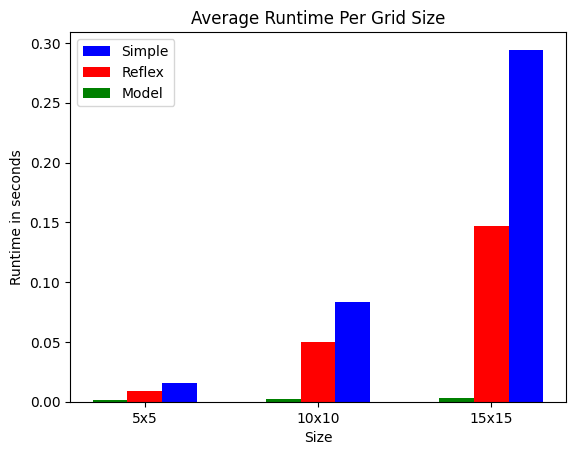

In [21]:
# Create 3, three-bar graphs with each agent being a different color.  Each group should be the size.
# The height of the bars should be the time.
import matplotlib.pyplot as plt

sizes = ["5x5", "10x10", "15x15"]
simple_times = [five_avg_simple, ten_avg_simple, fifteen_avg_simple]
reflex_times = [five_avg_reflex, ten_avg_reflex, fifteen_avg_reflex]
model_times = [five_avg_model, ten_avg_model, fifteen_avg_model]
bar_width = 0.2
x = np.arange(3)
graph = plt.bar(x + 0.2, simple_times, bar_width, label = "Simple", color = 'b')
graph = plt.bar(x, reflex_times, bar_width, label = "Reflex", color = 'r')
graph = plt.bar(x - 0.2, model_times, bar_width, label = "Model", color = 'g')
graph = plt.xticks(x, sizes)
graph = plt.title("Average Runtime Per Grid Size")
graph = plt.xlabel("Size")
graph = plt.ylabel("Runtime in seconds")
graph = plt.legend()
graph = plt.show()





# Simple Agent

This chart shoes the runtime of the simple agent for each of the grid sizes.  It shows that the time it takes the simple agent, moving completely randomly without any strategy or buffers to keep it within the grid, grows quadratically as the grid size increases.

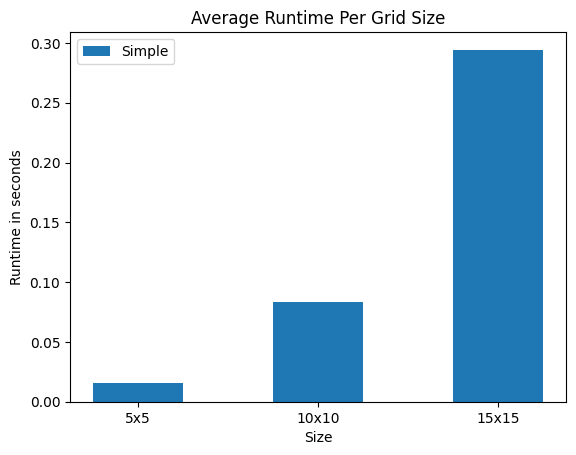

In [22]:
# Displays a chart showing the average runtime for the simple agent
import matplotlib.pyplot as plt

sizes = ["5x5", "10x10", "15x15"]
simple_times = [five_avg_simple, ten_avg_simple, fifteen_avg_simple]
bar_width = 0.5
graph = plt.bar(sizes, simple_times, bar_width, label = "Simple")
graph = plt.title("Average Runtime Per Grid Size")
graph = plt.xlabel("Size")
graph = plt.ylabel("Runtime in seconds")
graph = plt.legend()
graph = plt.show()





# Reflex Agent

This chart shoes the runtime of the reflex agent for each of the grid sizes.  The runtime for this agent is smaller than the simple agent due to the reflex agent having reflex sensors that keep it within the grid.  It still chooses an action at random.  It also appears to grow at a quadratic rate.

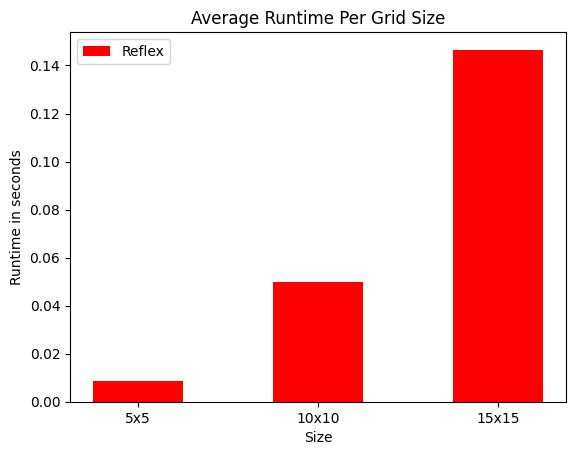

In [23]:
# Displays a chart showing the average runtime for the reflex agent
import matplotlib.pyplot as plt

sizes = ["5x5", "10x10", "15x15"]
reflex_times = [five_avg_reflex, ten_avg_reflex, fifteen_avg_reflex]
bar_width = 0.5
graph = plt.bar(sizes, reflex_times, bar_width, label = "Reflex", color = 'r')
graph = plt.title("Average Runtime Per Grid Size")
graph = plt.xlabel("Size")
graph = plt.ylabel("Runtime in seconds")
graph = plt.legend()
graph = plt.show()





# Model-Based Agent

This chart shows the runtime performance of the model-based agent for each grid size.  This agent had the best performance of all three agents.  This is becuase it includes reflex sensors that keep it within the grid as well as a built-in model/strategy to accomplish its task of cleaning the entire grid.

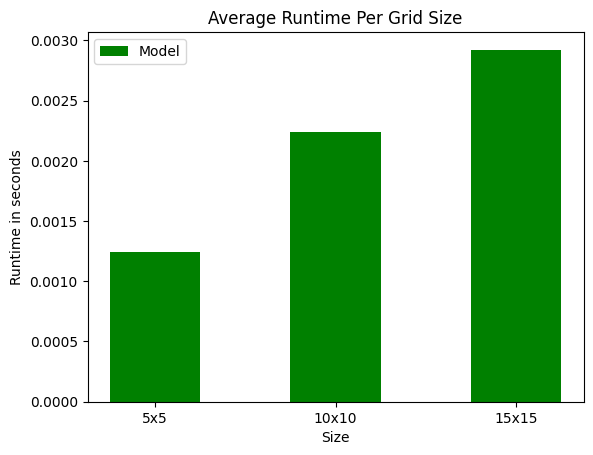

In [24]:
# Displays a chart showing the average runtime for the model agent
import matplotlib.pyplot as plt

sizes = ["5x5", "10x10", "15x15"]
model_times = [five_avg_model, ten_avg_model, fifteen_avg_model]
bar_width = 0.5
graph = plt.bar(sizes, model_times, bar_width, label = "Model", color = 'g')
graph = plt.title("Average Runtime Per Grid Size")
graph = plt.xlabel("Size")
graph = plt.ylabel("Runtime in seconds")
graph = plt.legend()
graph = plt.show()





## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

# Robustness of the Agent Implementations
1. The simple agent and reflex agent would eventually clean a rectangular room of unknown size because they move at random.  The reflex agent would accomplish this faster than the simple agent.  If the top/bottom side of the rectangle was larger than the left/right sides, then the model-based agent would be able to quickly clean the room.  If the rectangle had a longer height than width, then my model-based agent would only clean part of the room.  This is becuase it is built to assume the grid is a square and only calculates the dimension of one side of the room.
2. Again, the simple and reflex agents would eventually clean an entire irregular room with the reflex agent finishing first.  My model-based agent would not be able to clean an entire grid if it had an irregular shape.  It is built to handle square grids and calibrates itself measuring the dimension of one side of the room.  
3. If the room contains obstacles, the simple agent might eventually clean the room, but it would take longer than the reflex agent.  The reflex agent would be faster than the simple agent.  The model-based agent would not be able to clean the entire room as obstacles would cause it to skip sections of the grid.
4. If the dirt sensor only worked 90% of the time, the simple and reflex agents after a few random pass throughs through the entire grid would be able to clean the grid with the reflex agent finishing faster due to its in-tact bumper sensors.  Since the current version of the model-based agent only goes through the room once, it would not be able to clean the entire room if its dirt sensors only worked 90% of the time.
5. If the bumper sensor did not work 10% of the time, the simple agent would still eventually clean the entire room.  The reflex and model agents, however, might not be able to clean the room as fast as they did before.  This is because they now could accidentally go outside the grid, or in the case of the model agent, they could mistakenly re-clean something they already checked.

## Extra Credit task: Imperfect Dirt Sensor

[max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [25]:
# Your code and discussion goes here